<a href="https://colab.research.google.com/github/ankity7/PHY425_Ising_Model/blob/main/Ising_Model_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

In [2]:
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------



def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state



def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag

## NOTE: change these parameters for a smaller and faster simulation 
#----------------------------------------------------------------------


nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

#  MAIN PART OF THE CODE
#----------------------------------------------------------------------


for tt in range(nt):
    config = initialstate(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT



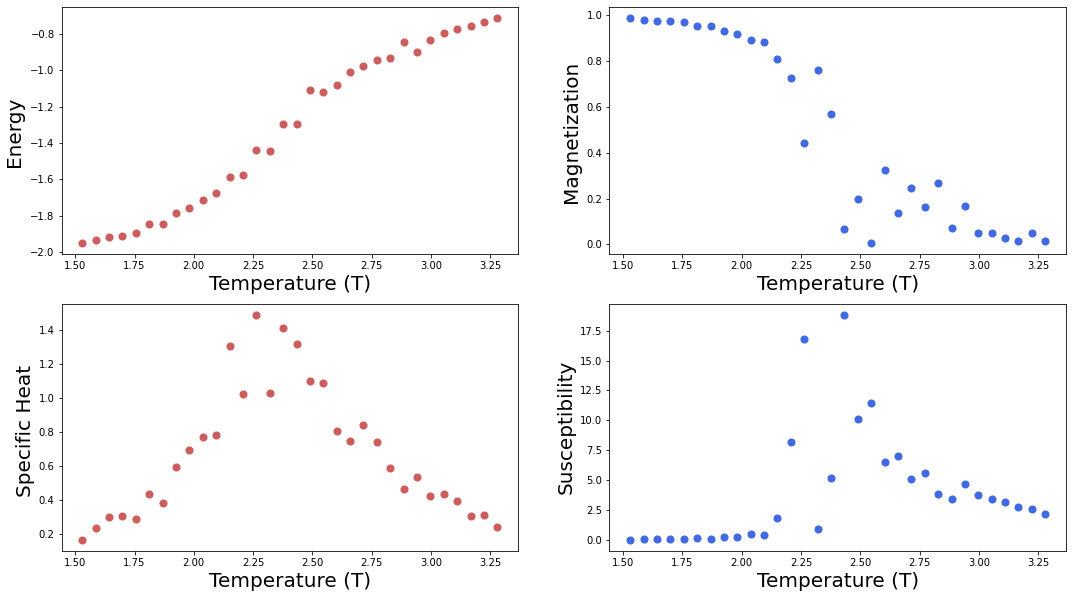

In [3]:
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [4]:
%matplotlib inline
# Simulating the Ising model


class Ising():
    ''' Simulating the Ising model '''    
    
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    

    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

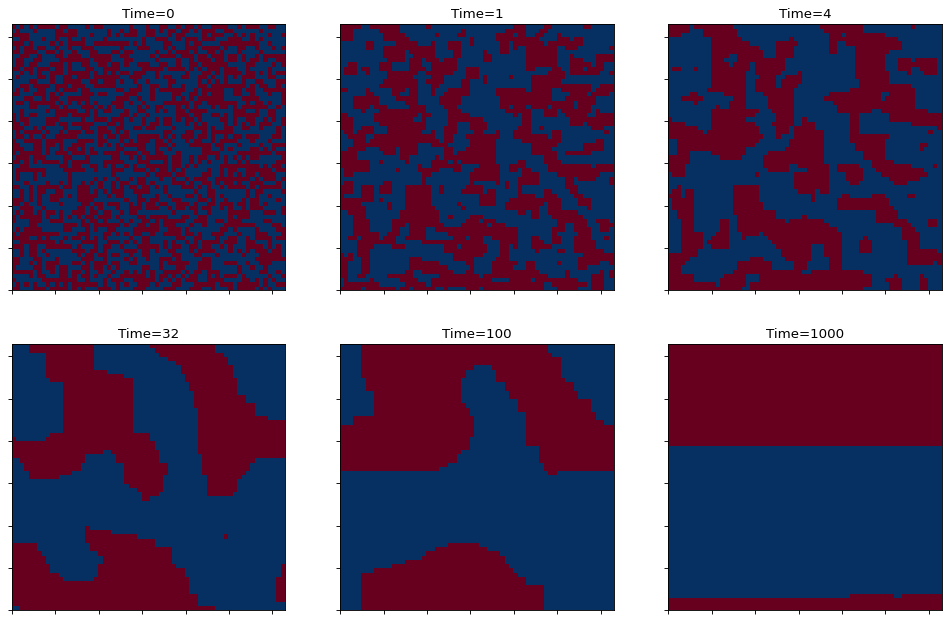

In [5]:
rm = Ising()
rm.simulate()

# Now real

In [24]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

In [3]:
############## Let's write a function for initial state ############
def intial_state(N):
  #This function will create a random spin configuration for initial condition
  ini_state=2*np.random.randint(2, size=(N,N))-1
  return ini_state

#Transition probabilities using Metropolis algorithm
Let $\mu$ and $\nu$ be the two states of the system generated by a Markov
process and let $E_{\mu} <E_{\nu}$. Using metropolis algorithm transition probabilities between $\mu$ and $\nu$ is given by,
$$ P(\mu \rightarrow \nu ) = \left( e^{-\beta(E_{\mu} -E_{\nu})} \right)    \: if  \; E_{\mu} -E_{\nu} > 0$$ 
$$ P(\mu \rightarrow \nu ) = 1   \: otherwise $$ 

In [4]:
################ Let's write a function for transition of states##########
######## We are interested in zero external field model first#############
##### H= -J(sum of nearest neighbours)
# J > 0 : ferromagnetic
# J < 0 : anti-ferromagnetic
def transition_metropolis(state,beta):
  for i in range(N):
    for j in range(N):
      index_i=np.random.randint(0, N)
      index_j=np.random.randint(0, N)
      #now we index of a random cell of the state
      s=state[index_i,index_j] # spin of this random cell
      # sum of all nearest neighbours in 2d with periodic boundary condition
      n_nbr=state[(index_i+1)%N,index_j]+state[(index_i-1)%N,index_i]+\
            state[index_i,(index_j+1)%N]+state[index_i,(index_j-1)%N]
      #calculating change in energy between two states
      delta_E=2*J*s*n_nbr

      # implementing metropolice transition probability
      if delta_E < 0:
        s= s*(-1) # flip the spin with probability = 1
      # generate a random number between 0 and 1
      elif rand() < np.exp(-(delta_E*beta)):
        s=s*(-1)  # fliping the spin if r is less than exp(-delta_E*beta)
      state[index_i,index_j]=s #update the state
  return state



#let's calculate energy of the state

In [5]:
# This function will calculate energy of the given configuration
def calc_Energy(state):
  energy=0
  n=len(state)
  for i in range(n):
    for j in range(n):
      S=state[i,j] # spin of the cell(ij) 
      # sum of all nearest neighbours in 2d with periodic boundary condition
      n_nbr=state[(i+1)%N,j]+state[(i-1)%N,j]+state[i,(j+1)%N]+state[i,(j-1)%N]
      # add energy
      energy=energy+(-n_nbr*S*J) #we have overcounted energy of every cell twice
  return energy/2 # to compensate overcounting

############# Energy per spin#########

def calc_Energy_per_spin(state):
  E=calc_Energy(state)
  u=E/len(state)
  return u


#let's calculate magnetization per spin of the state

In [10]:
def calc_magnetisation(state):
  M=np.sum(state)
  
  return M


def calc_magnetisation_per_spin(state):
  M=np.sum(state)
  m=M/(len(state))
  return m


#Final code to obtain observables

In [17]:
def get_observables(nt,eqSteps,mcSteps,T):
  for j in range(nt):
    kb=1 # boltzman cosntant ()
    config = intial_state(N)         # initialise a state
    E1 = 0
    M1 = 0
    E2 = 0
    M2 = 0
    beta=1.0/T[j] #beta  taking kb=1
    
    
    for i in range(eqSteps):         # equilibrate
        transition_metropolis(config, beta)           # Monte Carlo moves

    for i in range(mcSteps):
        transition_metropolis(config, beta )           
        Ene = calc_Energy(config)     # calculate the energy
        Mag = calc_magnetisation((config)) # calculate the magnetisation

        E1 = E1 + Ene                   # Energy (Extensive)
        M1 = M1 + Mag                   # Magnetisation (Extensive)
        E2 = E2 + Ene*Ene               # sum of E^2 (Extensive)
        M2 = M2 + Mag*Mag               # sum of M^2 (Extensive)
    #devide by mcSteps to get E1,M1,E2,M2 per step
    # Create arrays for intensive values
    E= np.zeros(nt) # Energy
    M =np.zeros(nt)  # Magnetization
    C=np.zeros(nt)   # Specific Heat
    X = np.zeros(nt) # Susceptibility 

    #devide by number of sites and iteractions to obtain intensive values
    n=N*N # since 2d square grid so tot num of spins
    n1=1.0/(mcSteps*n)
    n2  = 1.0/(mcSteps*mcSteps*n)
    
    E[j] = n1*E1                             # internal energy per spin
    M[j] = n1*M1                             # magnetisation per spin
    X[j] = (n1*M2 - n2*M1*M1)*beta           #Magnetic susceptibility per spin
    C[j] = (n1*E2 - n2*E1*E1)*(beta**2)      #Specific heat per spin
  return E,M,X,C 


#initial condn


In [20]:
## You can change these parameters for desired simulation 
#----------------------------------------------------------------------
J=1

nT      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation
T       = np.linspace(1.53, 3.28, nt) # array for temperature


In [21]:
E,M,X,C = get_observables(nt,eqSteps,mcSteps,T)

In [23]:
E

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.63859375])

# Let's plot

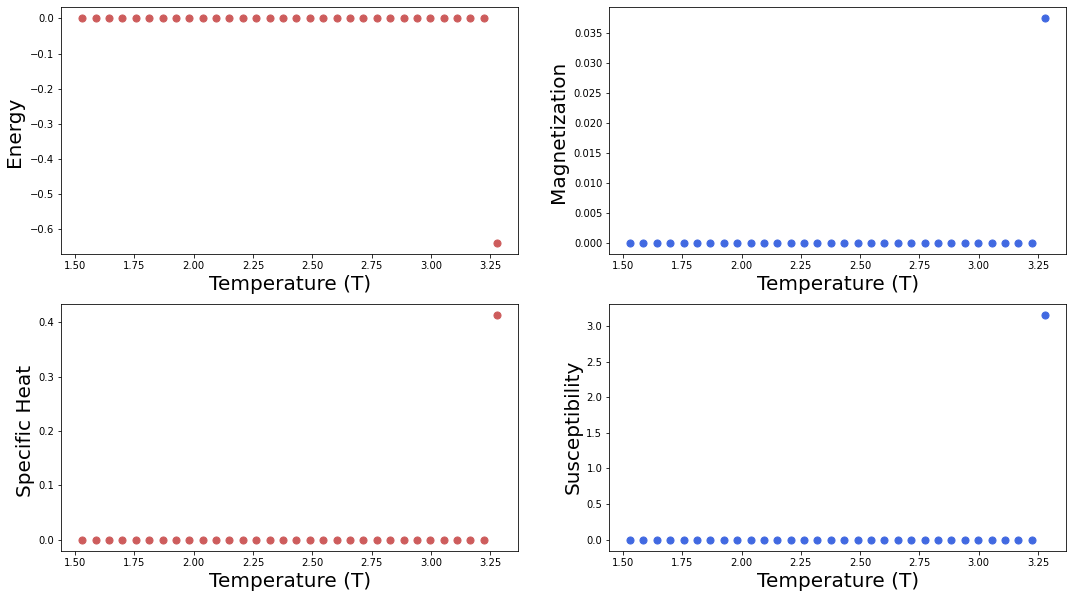

In [22]:
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');